In this tutorial we show how to run ULTRAFAST for the ground state optimization of the Heisenberg model

\begin{equation}
\hat{H} = J_\text{ex}\sum_{\langle ij \rangle}\hat{S}_i \cdot \hat{S}_j
\end{equation}
defined on a $4\times 4$ lattice with $J_\text{ex}=1$.

The input data, such as network size, the optimization hyperparameters and model-dependent quantities used in this tutorial are set in the file "Examples/groundstate/main.jl". In particular, we initizilize an RBM with $\alpha=2$ and we perform 300 iterations with learning rate $\eta = 0.005$. We choose 2000 Monte Carlo samples and we parallelize the simulation across 3 workers (plus the master worker).

In [1]:
include("src/main/main.jl")

# Starting ground state optimization for the Heisenberg Hamiltonian, with 16 = 4 x 4 spins and α=2
# Number of workers = 4
# The following hyper-parameters are used:
# Number of sweeps = 2000,  iteration step = 300,  learning rate = 0.005
Iteration step #10
Energy: -36.50576815538164 +- 107.69156695555571
 
Iteration step #20
Energy: -36.330318828100246 +- 107.18255386312377
 
Iteration step #30
Energy: -36.142818099093866 +- 98.68939285039563
 
Iteration step #40
Energy: -38.04390026971374 +- 82.4028073226377
 
Iteration step #50
Energy: -41.89800004524652 +- 27.135194063022084
 
Iteration step #60
Energy: -43.71165762441394 +- 11.772478931051854
 
Iteration step #70
Energy: -43.94130136350545 +- 6.158103582545235
 
Iteration step #80
Energy: -44.32638214465312 +- 6.616803390444755
 
Iteration step #90
Energy: -44.412975348332935 +- 5.928300888612564
 
Iteration step #100
Energy: -44.755645434557486 +- 3.420937057571623
 
Iteration step #110
Energy: -44.77479382254967 +- 2.76259161608

The optiization looks successful! To better visualize this, let us plot the evolution of the energy and energy variance (stored respectively in the variables Energy_ and Variance_) during the ground state optimization. To this purpose we first import the Plots package. 

In [2]:
using Plots

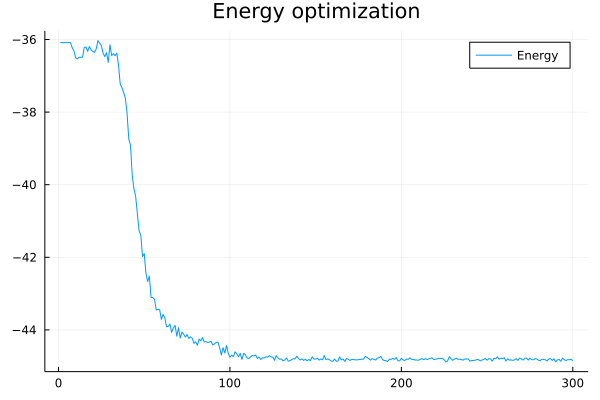

In [3]:
#Let's plot the evolution of the variational energy during the training
plot(collect(1:GS_HP.n_iter),Energy_,title = "Energy optimization", label = "Energy")

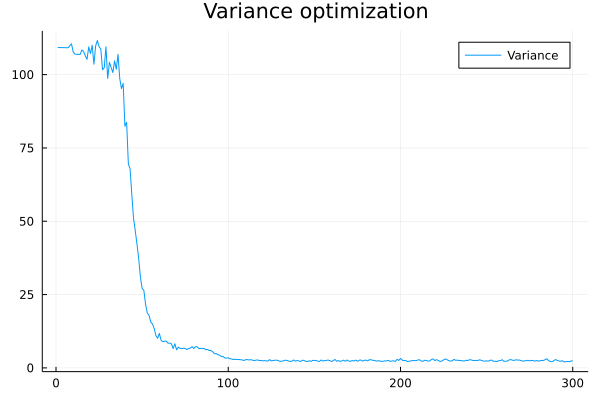

In [4]:
# Let's plot the evolution of the energy variance during the training
plot(collect(1:GS_HP.n_iter),Variance_,title = "Variance optimization", label = "Variance")

The (independent) network parameters obtained at the end of the ground state optimization are stored in the folder "src/output" and are termed "W_RBM_N_alpha_real.jl" for their real part, and "W_RBM_N_alpha_imag.jl" for their imaginary part. Now we upload them for later use.

In [5]:
#Upload trained network parameters
W_RBM = readdlm("W_RBM_16_2_real.jl") .+ im*readdlm("W_RBM_16_2_imag.jl");

With ULTRAFAST it is possible to evaluate the ground state spin-spin correlations

\begin{equation}
C(i,j) = \langle \hat{S}_i \cdot \hat{S}_j \rangle,
\end{equation}

for any $i,j$, with $i,j<=N$. This can be done by calling the function Spincorr_GS(), which returns the ground state value of $C(i,j)$ estimated over nSample states. Here, we choose nSample = 10000 and $i=1$, $j=2$.

In [6]:
#Let's calculate spin-spin correlation between spin 1 and spin 2 of the 4x4 lattice sampling nSample states
nSample = 10000
Spincorr_GS(W_RBM[:],nSample,1,2)

-1.3815571659993242